In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import train_test_split


In [2]:
fifa=pd.read_csv('C:\\Users\\AVIRAJ\\Downloads\\fifa.csv')
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
fifa_var=pd.read_csv('C:\\Users\\AVIRAJ\\Downloads\\fifa_+variable_information.csv')
fifa_var.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [4]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

In [5]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [6]:
fifa.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
fifa.drop(['ID','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [9]:
fifa.drop(['Jersey Number'],axis=1,inplace=True)

In [10]:
fifa.drop(['Volleys'],axis=1,inplace=True)

#### Dropped ID,Photo,Flag,CLub Logo,Jersey Number & Volleys as these were unnecessary for the Transfer details to the club

In [11]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [12]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [13]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [14]:
cols=['Value','Wage','Release Clause']
c={'K':1000,'M':1000000}

In [15]:
fifa['Value']=fifa['Value'].replace({'€':' '})
        

In [16]:
fifa['Value']=fifa['Value'].apply(lambda x:x.strip('€'))

In [18]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Hence we have successfully removed the '€' symbol from Value,Wage,ReLease Clause as per requirements

In [19]:
fifa['Value']=fifa['Value'].replace({'M':'000000'})
fifa['Value']=fifa['Value'].replace({'K':'000'})


In [20]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [21]:
mp = {'K':' * 10**3', 'M':' * 10**6'}

In [22]:
y = fifa['Value'].unique()

strings = []
numbers = []

for number in y:
    if number[-1:] == 'K':  # Check if the last digit is K
        #strings.append(number[:-1] + " Thousand")  # Append a Thousand after removing the last char
        numbers.append(float(number[:-1]) * 1000)  # Remove the last digit with [:-1], and convert to int and multiply by 1000
    elif number[-1:] == 'M':  # Check if the last digit is M
        #strings.append(number[:-1] + " Million")  # Append a Million after removing the last char
        numbers.append(float(number[:-1]) * 1000000)  # Remove the last digit with [:-1], and convert to int and multiply by 1000000
    else:  # just in case data doesnt have an M or K
        strings.append(number)
        numbers.append(int(number))

In [23]:
p=pd.Series(numbers)
fifa['Value']=p

In [24]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [25]:
fifa['Wage']=fifa['Wage'].apply(lambda x:x.strip('€'))

In [26]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [27]:
y = fifa['Wage'].unique()

strings = []
numbers = []

for number in y:
    if number[-1:] == 'K':  # Check if the last digit is K
        #strings.append(number[:-1] + " Thousand")  # Append a Thousand after removing the last char
        numbers.append(float(number[:-1]) * 1000)  # Remove the last digit with [:-1], and convert to int and multiply by 1000
    elif number[-1:] == 'M':  # Check if the last digit is M
        #strings.append(number[:-1] + " Million")  # Append a Million after removing the last char
        numbers.append(float(number[:-1]) * 1000000)  # Remove the last digit with [:-1], and convert to int and multiply by 1000000
    else:  # just in case data doesnt have an M or K
        strings.append(number)
        numbers.append(int(number))

In [28]:
p=pd.Series(numbers)
fifa['Wage']=p

In [29]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [30]:
fifa['Release Clause']=fifa['Release Clause'].astype(str)
fifa['Release Clause']=fifa['Release Clause'].apply(lambda x:x.strip('€'))

In [31]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [33]:
y = fifa['Release Clause'].unique()

strings = []
numbers = []

for number in y:
    if number[-1:] == 'K':  # Check if the last digit is K
        #strings.append(number[:-1] + " Thousand")  # Append a Thousand after removing the last char
        numbers.append(float(number[:-1]) * 1000)  # Remove the last digit with [:-1], and convert to int and multiply by 1000
    elif number[-1:] == 'M':  # Check if the last digit is M
        #strings.append(number[:-1] + " Million")  # Append a Million after removing the last char
        numbers.append(float(number[:-1]) * 1000000)  # Remove the last digit with [:-1], and convert to int and multiply by 1000000
    else:  # just in case data doesnt have an M or K
        strings.append(number)
        numbers.append(float(number))

In [34]:
p=pd.Series(numbers)
fifa['Release Clause']=p

In [35]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


### Hence we have successfully removed the suffix,prefix and convert Millions,Thousands into appropriate numbers.Also Converted Value,Wage,Release Clause are float datatype now

In [36]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [37]:
fifa['Joined'].value_counts()

Jul 1, 2018     1538
Jul 1, 2017     1133
Jan 1, 2018      635
Jul 1, 2016      614
Jul 1, 2015      368
                ... 
Dec 1, 2005        1
Jun 21, 2015       1
Aug 19, 2012       1
Jul 11, 2011       1
May 16, 2018       1
Name: Joined, Length: 1736, dtype: int64

In [38]:
fifa['Joined']=pd.DatetimeIndex(fifa['Joined']).year

In [39]:
fifa['Joined'].fillna(fifa['Joined'].mode(),inplace=True)

In [40]:
fifa['Joined'].isna().sum()

1553

In [41]:
fifa['Joined'].value_counts()

2018.0    6569
2017.0    4307
2016.0    2246
2015.0    1336
2014.0     818
2013.0     458
2012.0     340
2011.0     201
2010.0     131
2009.0      78
2008.0      53
2007.0      38
2006.0      18
2005.0      17
2003.0      13
2004.0      12
2002.0      10
1998.0       3
2001.0       2
2000.0       2
1999.0       1
1991.0       1
Name: Joined, dtype: int64

In [42]:
fifa['Joined'].fillna(2018,inplace=True)

In [43]:
fifa['Joined'].isnull().sum()

0

In [44]:
fifa['Joined']=fifa['Joined'].astype(int)

#### Joined-Year taken only & converted to int

In [45]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [46]:
#fifa['Contract Valid Until']=pd.DatetimeIndex(fifa['Contract Valid Until']).year

In [47]:
#fifa['Contract Valid Until']=pd.DatetimeIndex(fifa['Contract Valid Until']).date

In [48]:
import datetime as dt


In [49]:
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].apply(pd.to_datetime)

#### Contract Valid Until converted to DateTime

In [50]:
fifa['Weight'].value_counts()

165lbs    1483
154lbs    1439
176lbs    1041
172lbs     987
159lbs     946
161lbs     936
163lbs     901
170lbs     860
168lbs     836
174lbs     705
150lbs     660
157lbs     617
181lbs     584
183lbs     513
179lbs     507
152lbs     506
143lbs     505
187lbs     448
148lbs     435
185lbs     432
146lbs     365
141lbs     322
190lbs     288
194lbs     278
139lbs     206
192lbs     193
137lbs     165
198lbs     156
196lbs     143
132lbs     127
201lbs      93
134lbs      87
203lbs      75
205lbs      60
207lbs      45
209lbs      34
130lbs      33
128lbs      31
212lbs      23
123lbs      18
126lbs      14
214lbs      11
121lbs      10
216lbs       9
117lbs       6
218lbs       5
119lbs       4
225lbs       3
223lbs       3
227lbs       2
110lbs       2
236lbs       2
243lbs       1
229lbs       1
234lbs       1
220lbs       1
115lbs       1
Name: Weight, dtype: int64

In [51]:
fifa['Weight']=fifa['Weight'].astype(str)
fifa['Weight']=fifa['Weight'].apply(lambda x:x.strip('lbs'))

In [52]:
fifa['Weight']=fifa['Weight'].astype(float)

#### Weight has been changed to float and lbs has been removed

In [53]:
fifa['Height'].value_counts()

6'0     2881
5'10    2479
5'9     2238
5'11    2159
6'2     2015
6'1     1908
6'3      990
5'8      946
5'7      905
6'4      749
5'6      316
6'5      246
5'5      145
6'6       93
5'4       30
6'7       21
5'3       18
6'8       10
5'2        5
5'1        3
6'9        2
Name: Height, dtype: int64

In [54]:
fifa['Height']=fifa['Height'].astype(str)

In [55]:

fifa['Height']=[i.replace("'",".") for i in fifa['Height']]


In [56]:
fifa['Height']=fifa['Height'].apply(lambda x:"".join(x.split()))

In [57]:
fifa['Height']=fifa['Height'].fillna(5.11)

In [58]:
fifa['Height']=fifa['Height'].astype(float)

In [59]:
fifa['Height'].isnull().sum()

48

In [60]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


#### Height is converted to float and '  removed & replaced with . successfully

### Missing value imputation

In [61]:
#fifa.isnull().sum()

In [62]:
fifa['Club']=fifa['Club'].fillna('None')

In [63]:
fifa['Value']=fifa['Value'].fillna(fifa['Value'].mean())

In [64]:
fifa['Wage']=fifa['Wage'].fillna(fifa['Wage'].mean())

In [65]:
fifa['Preferred Foot']=fifa['Preferred Foot'].fillna('Right')

In [66]:
fifa['International Reputation']=fifa['International Reputation'].fillna(1)

In [67]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [68]:
fifa['Weak Foot']=fifa['Weak Foot'].fillna(3)

In [69]:
nc=fifa.isnull().sum()

In [70]:
#fifa['Skill Moves']=fifa['Skill Moves'].fillna(3)
fifa['Skill Moves'].value_counts()

2.0    8565
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: Skill Moves, dtype: int64

In [71]:
fifa['Skill Moves']=fifa['Skill Moves'].fillna(fifa['Skill Moves'].mode())

In [72]:
fifa['Work Rate']=fifa['Work Rate'].fillna('Medium/ Medium')

In [73]:
fifa['Body Type']=fifa['Body Type'].fillna(fifa['Body Type'].mode()[0])

In [74]:
fifa['Position']=fifa['Position'].fillna(fifa['Position'].mode()[0])

In [75]:
fifa.drop(['Loaned From'],axis=1,inplace=True)

#### Dropped 'Loaned from' column because it has 85% null values


In [76]:
fifa['Contract Valid Until']=fifa['Contract Valid Until'].fillna(fifa['Contract Valid Until'].mode()[0])

In [77]:
fifa.isnull().sum()

Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                            0
Value                           0
Wage                            0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                    48
Work Rate                       0
Body Type                       0
Position                        0
Joined                          0
Contract Valid Until            0
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing                    48
BallControl                    48
Acceleration                   48
SprintSpeed   

In [78]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [79]:
cols=['Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

In [80]:
for i in cols:
    fifa[i]=fifa[i].fillna(fifa[i].mean())

In [81]:
fifa.isnull().sum()

Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                            0
Value                           0
Wage                            0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                    48
Work Rate                       0
Body Type                       0
Position                        0
Joined                          0
Contract Valid Until            0
Height                         48
Weight                          0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Dribbling                       0
Curve                           0
FKAccuracy                      0
LongPassing                     0
BallControl                     0
Acceleration                    0
SprintSpeed   

In [82]:
fifa['Release Clause']=fifa['Release Clause'].fillna(fifa['Release Clause'].mean())

In [83]:
fifa.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         0
Value                        0
Wage                         0
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                 48
Work Rate                    0
Body Type                    0
Position                     0
Joined                       0
Contract Valid Until         0
Height                      48
Weight                       0
Crossing                     0
Finishing                    0
HeadingAccuracy              0
ShortPassing                 0
Dribbling                    0
Curve                        0
FKAccuracy                   0
LongPassing                  0
BallControl                  0
Acceleration                 0
SprintSpeed                  0
Agility                      0
Reactions                    0
Balance 

#### Hence for all columns,Missing value imputations have been completed successfully.
#### For Categorical Features- Mode Values
#### Few Numerical features- Mode Values(As mean does not give desired results)
#### Float Numerical features- Mean Values(As per given in the document)

### 1.	Plot the distribution of Overall rating for all players. 

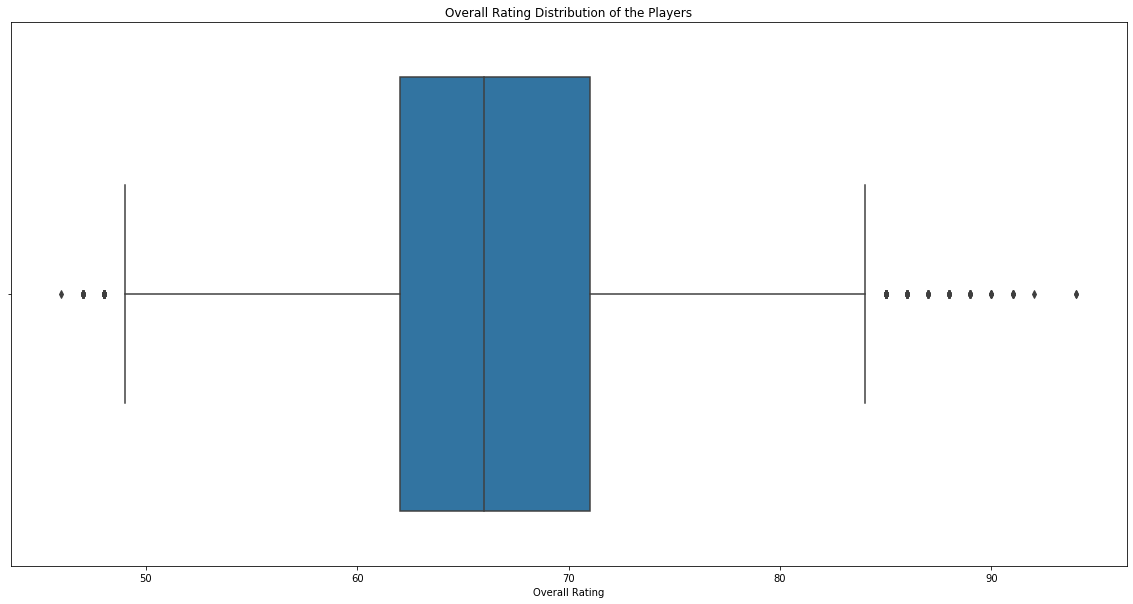

In [84]:
plt.subplots(figsize=(20,10))
sns.boxplot(fifa['Overall'])
plt.title('Overall Rating Distribution of the Players')
plt.xlabel('Overall Rating')
plt.show()

#### Observations-1)Most of the players have average rating from 62-72 overall ratings with median of around 66. 
#### 2)There are outliers lying in the ratings .Means there are few players available which are extremely good & costlier.Which is not good for the club as they have limited budget 
#### 3)There are few outliers below 50 ratings.Hence these are the players which have to be avoided to be bought by the club.

### 2.	Generate pair plots for the following variables:
#### Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


C:\Users\AVIRAJ\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\AVIRAJ\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


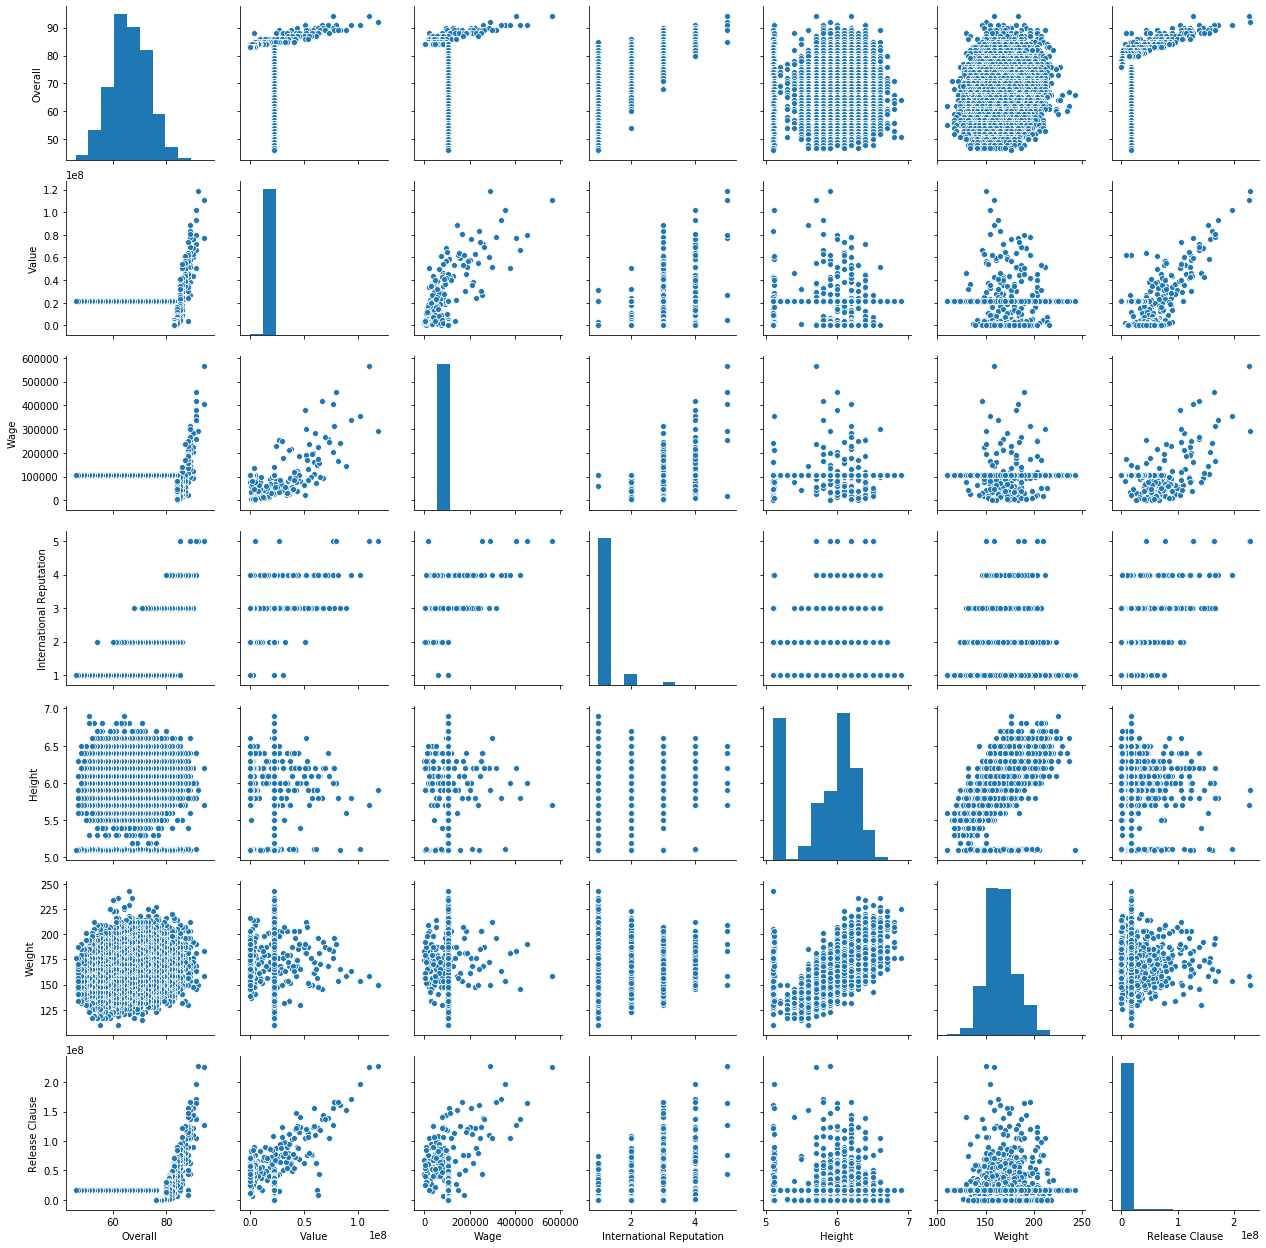

In [85]:
sns.pairplot(fifa,vars=['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause'])
plt.show()

#### Observation of Pair plots-

#### 1)Our Target Variable-Overall Ratings is directly correlated with Value,Wage,International Reputation & Release Clause.Hence players with Good ratings are highly valued,highly paid wages & their reputation is more in the market,thus leading to more release clause in the contract.These Players although good for the team,cant be all bought by the club,as this may lead to financial instability due to high economic spendings.Interestingly,the height & weight are not having strong correlation with the Ratings.Which means a good player need to very tall & healthy much.

#### 2) Also Value,Wage,International Reputation & Release clause are positively correlated with each other & also all are not correlated nor covariant much with the Height & Weight(Physical Structure) of the players.  Hence the most starting fact we see that even if Physical features like Height & Weight may not be up to the mark for certain players,maybe because  of their other characteristics,they are rated as one of the most Costliest & valuable football players.

### 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020

In [86]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [87]:
Top20=fifa[fifa['Contract Valid Until']=='2020-01-01'].sort_values(by='Overall',ascending=False).head(20)

#### Top20 is the table which generates top20 players by Overall Rating &  whose contract ends on 1-1-2020

In [88]:
Top20

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,David Silva,32,Spain,90,90,Manchester City,63000000.0,225000.0,Left,4.0,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,121300000.0
21,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,64500000.0,100000.0,Right,4.0,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,119300000.0
24,G. Chiellini,33,Italy,89,89,Juventus,69500000.0,265000.0,Left,4.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,137300000.0
31,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,36000000.0,210000.0,Right,3.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,112100000.0
39,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,52000000.0,190000.0,Right,4.0,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,121100000.0
50,D. Mertens,31,Belgium,87,87,Napoli,36500000.0,28000.0,Right,3.0,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,95300000.0


### a)	What would the average wage for this set of players be?

In [89]:
Avg_wage_top20=Top20['Wage'].mean()

In [90]:
print("Hence the Average Wage to be given to these set of top 20 players are : ",Avg_wage_top20,"euros")

Hence the Average Wage to be given to these set of top 20 players are :  162750.0 euros


#### Observation-Hence we see that the Average  Wage for these top20 players are around 163k euros.It is quite high but to attract these potential players who have a chance to come to Brussels FC after contrac ends,it has to be paid.

### b)	What is the average age?

In [91]:
Avg_age_top20=round(Top20['Age'].mean(),0)

In [92]:
print("Hence the Average Age of the Top20 players are :",Avg_age_top20,"years")

Hence the Average Age of the Top20 players are : 31.0 years


#### Observation- The Average Age of the Players is quite high.The Club should target players around 30 region so that they can perform well for few years.Rest taking a few older but good potential players at affordable cost for the club is also affordable for the club.

### c)	Is there a correlation between the Overall rating and Value for these players?

In [93]:
print("Correlation Values :-")
Top20[['Overall','Value']].corr()

Correlation Values :-


,Overall,Value
Overall,1.00000,0.86525
Value,0.86525,1.00000


#### Observation- There is a very strong correlation of the Overall Ratings with Value of the players.Hence if the ratings are better,they tend to become costlier players in the market more.

## 4.	Generate tables containing the top 5 players by Overall rating for each unique position

In [94]:
fifa['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

### Acquired Unique Positions.Generating Tables for top5 players in each position

### a)	Are there any players appearing in more than one Table. Please point out such players.

#### Goalkeeper

In [95]:
GK=fifa[fifa['Position']=='GK'].sort_values(by='Overall',ascending=False)[0:5]
GK

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,Right,3.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0
18,M. ter Stegen,26,Germany,89,92,FC Barcelona,53500000.0,130000.0,Right,3.0,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,113700000.0
19,T. Courtois,26,Belgium,89,90,Real Madrid,51500000.0,300000.0,Left,4.0,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,105600000.0
22,M. Neuer,32,Germany,89,89,FC Bayern München,27000000.0,255000.0,Right,5.0,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,44600000.0


#### Defender

In [96]:
RB=fifa[fifa['Position']=='RB'].sort_values(by='Overall',ascending=False)[0:5]
RB

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
69,Azpilicueta,28,Spain,86,86,Chelsea,15500000.0,25000.000000,Right,3.0,...,78.0,88.0,90.0,86.0,13.0,9.0,10.0,6.0,5.0,33300000.0
135,K. Walker,28,England,84,84,Manchester City,2100000.0,83000.000000,Right,3.0,...,75.0,78.0,84.0,83.0,12.0,6.0,16.0,15.0,8.0,6900000.0
123,Carvajal,26,Spain,84,87,Real Madrid,8500000.0,65000.000000,Right,3.0,...,77.0,83.0,83.0,85.0,13.0,13.0,15.0,9.0,15.0,54600000.0
192,Sergi Roberto,26,Spain,83,86,FC Barcelona,475000.0,104479.166667,Right,3.0,...,76.0,75.0,83.0,83.0,14.0,16.0,11.0,15.0,10.0,25200000.0
216,L. Bender,29,Germany,83,83,Bayer 04 Leverkusen,10000.0,104479.166667,Right,3.0,...,83.0,88.0,86.0,82.0,12.0,6.0,7.0,12.0,7.0,57600000.0


In [97]:
RWB=fifa[fifa['Position']=='RWB'].sort_values(by='Overall',ascending=False)[0:5]
RWB

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
450,M. Ginter,24,Germany,80,82,Borussia Mönchengladbach,2.196636e+07,104479.166667,Right,2.0,...,71.0,82.0,84.0,77.0,12.0,10.0,6.0,8.0,10.0,1900000.0
517,S. Coleman,29,Republic of Ireland,80,80,Everton,2.196636e+07,104479.166667,Right,2.0,...,82.0,78.0,84.0,82.0,5.0,15.0,10.0,13.0,7.0,6200000.0
465,P. Kadeřábek,26,Czech Republic,80,81,TSG 1899 Hoffenheim,2.196636e+07,104479.166667,Right,2.0,...,78.0,72.0,79.0,76.0,10.0,11.0,14.0,13.0,7.0,10900000.0
652,D. Caligiuri,30,Italy,79,79,FC Schalke 04,2.196636e+07,104479.166667,Right,2.0,...,76.0,70.0,72.0,68.0,12.0,10.0,13.0,6.0,14.0,903000.0
766,Pablo Maffeo,20,Spain,78,86,VfB Stuttgart,2.196636e+07,104479.166667,Right,1.0,...,62.0,76.0,81.0,80.0,10.0,7.0,14.0,12.0,15.0,795000.0


In [98]:
CB=fifa[fifa['Position']=='CB'].sort_values(by='Overall',ascending=False)[0:5]
CB

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
12,D. Godín,32,Uruguay,90,90,Atlético Madrid,60000000.0,285000.0,Right,3.0,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,111000000.0
42,S. Umtiti,24,France,87,92,FC Barcelona,46500000.0,82000.0,Left,3.0,...,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,123200000.0
73,M. Benatia,31,Morocco,86,86,Juventus,31500000.0,53000.0,Right,3.0,...,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,98800000.0
89,N. Otamendi,30,Argentina,85,85,Manchester City,34500000.0,29000.0,Right,3.0,...,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0,54500000.0
102,Naldo,35,Brazil,85,85,FC Schalke 04,20500000.0,98000.0,Right,3.0,...,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0,84000000.0


In [99]:
RCB=fifa[fifa['Position']=='RCB'].sort_values(by='Overall',ascending=False)[0:5]
RCB

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
39,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,52000000.0,190000.0,Right,4.0,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,121100000.0
54,Piqué,31,Spain,87,87,FC Barcelona,39000000.0,57000.0,Right,4.0,...,86.0,91.0,86.0,84.0,10.0,11.0,14.0,15.0,8.0,102700000.0
62,R. Varane,25,France,86,91,Real Madrid,37000000.0,93000.0,Right,3.0,...,82.0,87.0,88.0,87.0,11.0,11.0,9.0,5.0,14.0,74300000.0
70,L. Bonucci,31,Italy,86,86,Juventus,22000000.0,140000.0,Right,3.0,...,86.0,90.0,86.0,80.0,2.0,2.0,3.0,2.0,4.0,26900000.0


In [100]:
LCB=fifa[fifa['Position']=='LCB'].sort_values(by='Overall',ascending=False)[0:5]
LCB

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
24,G. Chiellini,33,Italy,89,89,Juventus,69500000.0,265000.0,Left,4.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,137300000.0
34,M. Hummels,29,Germany,88,88,FC Bayern München,30000000.0,250000.0,Right,4.0,...,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,123000000.0
44,K. Koulibaly,27,Senegal,87,90,Napoli,41500000.0,92000.0,Right,3.0,...,78.0,91.0,88.0,86.0,7.0,11.0,7.0,13.0,5.0,120300000.0
51,J. Vertonghen,31,Belgium,87,87,Tottenham Hotspur,45500000.0,105000.0,Left,3.0,...,83.0,90.0,87.0,88.0,6.0,10.0,9.0,12.0,7.0,69700000.0
59,V. van Dijk,26,Netherlands,86,88,Liverpool,40500000.0,120000.0,Right,3.0,...,83.0,88.0,89.0,84.0,13.0,10.0,13.0,11.0,11.0,105900000.0


In [101]:
LB=fifa[fifa['Position']=='LB'].sort_values(by='Overall',ascending=False)[0:5]
LB

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
35,Marcelo,30,Brazil,88,88,Real Madrid,4000000.0,135000.0,Left,4.0,...,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,66600000.0
49,Jordi Alba,29,Spain,87,87,FC Barcelona,55000000.0,235000.0,Left,3.0,...,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0,79100000.0
64,Alex Sandro,27,Brazil,86,86,Juventus,26000000.0,74000.0,Left,3.0,...,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0,5.0,74000000.0
85,D. Alaba,26,Austria,85,87,FC Bayern München,40000000.0,49000.0,Left,4.0,...,79.0,80.0,82.0,80.0,5.0,7.0,14.0,15.0,9.0,78000000.0
106,Filipe Luís,32,Brazil,85,85,Atlético Madrid,12500000.0,27000.0,Left,3.0,...,88.0,78.0,84.0,86.0,11.0,15.0,9.0,9.0,5.0,68300000.0


In [102]:
LWB=fifa[fifa['Position']=='LWB'].sort_values(by='Overall',ascending=False)[0:5]
LWB

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
474,N. Schulz,25,Germany,80,81,TSG 1899 Hoffenheim,2.196636e+07,104479.166667,Left,1.0,...,75.0,74.0,76.0,77.0,13.0,9.0,15.0,7.0,14.0,4900000.0
605,J. Hector,28,Germany,79,79,1. FC Köln,2.196636e+07,104479.166667,Left,3.0,...,78.0,76.0,79.0,79.0,9.0,10.0,10.0,12.0,14.0,719000.0
581,Granell,29,Spain,79,79,Girona FC,2.196636e+07,104479.166667,Left,1.0,...,69.0,55.0,75.0,65.0,6.0,13.0,13.0,14.0,14.0,574000.0
601,Jonny,24,Spain,79,83,Wolverhampton Wanderers,2.196636e+07,104479.166667,Right,2.0,...,70.0,77.0,79.0,82.0,7.0,10.0,12.0,10.0,6.0,391000.0
787,J. Mojica,25,Colombia,78,81,Girona FC,2.196636e+07,104479.166667,Left,1.0,...,69.0,67.0,78.0,79.0,13.0,8.0,14.0,9.0,15.0,471000.0


#### Midfield

In [103]:
RCM=fifa[fifa['Position']=='RCM'].sort_values(by='Overall',ascending=False)[0:5]
RCM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
53,I. Rakitić,30,Croatia,87,87,FC Barcelona,35000000.0,81000.0,Right,4.0,...,81.0,72.0,74.0,70.0,14.0,11.0,12.0,5.0,9.0,79900000.0
82,J. Kimmich,23,Germany,85,88,FC Bayern München,23000000.0,70000.0,Right,3.0,...,82.0,75.0,81.0,79.0,8.0,15.0,7.0,15.0,15.0,77700000.0
83,Saúl,23,Spain,85,90,Atlético Madrid,19000000.0,91000.0,Left,3.0,...,83.0,77.0,79.0,76.0,7.0,13.0,12.0,10.0,9.0,55200000.0


In [104]:
RM=fifa[fifa['Position']=='RM'].sort_values(by='Overall',ascending=False)[0:5]
RM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
25,K. Mbappé,19,France,88,95,Paris Saint-Germain,59500000.0,160000.0,Right,3.0,...,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,1.264000e+08
26,M. Salah,26,Egypt,88,89,Liverpool,62000000.0,150000.0,Left,3.0,...,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,1.698705e+07
122,F. Thauvin,25,France,84,87,Olympique de Marseille,9500000.0,48000.0,Left,2.0,...,82.0,46.0,29.0,31.0,8.0,11.0,14.0,10.0,9.0,4.680000e+07
137,José Callejón,31,Spain,84,84,Napoli,2700000.0,3000.0,Right,3.0,...,79.0,64.0,32.0,32.0,8.0,5.0,14.0,11.0,11.0,2.560000e+07
138,A. Di María,30,Argentina,84,84,Paris Saint-Germain,3400000.0,9000.0,Left,4.0,...,82.0,35.0,59.0,56.0,10.0,7.0,11.0,12.0,11.0,9.000000e+07


In [105]:
RAM=fifa[fifa['Position']=='RAM'].sort_values(by='Overall',ascending=False)[0:5]
RAM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
129,J. Cuadrado,30,Colombia,84,84,Juventus,3.800000e+06,47000.000000,Right,3.0,...,80.0,63.0,70.0,74.0,5.0,5.0,13.0,6.0,9.0,5.230000e+07
171,H. Ziyech,25,Morocco,83,86,Ajax,1.400000e+06,104479.166667,Left,3.0,...,83.0,52.0,66.0,36.0,11.0,7.0,11.0,8.0,14.0,4.850000e+07
1705,Allan Bardinho,26,Brazil,75,75,Botafogo,2.196636e+07,104479.166667,Left,1.0,...,71.0,23.0,33.0,32.0,12.0,8.0,17.0,8.0,15.0,1.698705e+07
2242,Jacson Zonta,34,Brazil,74,74,Vitória,2.196636e+07,104479.166667,Right,1.0,...,66.0,31.0,21.0,22.0,8.0,14.0,9.0,9.0,12.0,1.698705e+07
2322,Sebas Couteira,30,Brazil,74,74,Atlético Paranaense,2.196636e+07,104479.166667,Right,1.0,...,71.0,32.0,52.0,41.0,15.0,13.0,12.0,10.0,9.0,1.698705e+07


In [106]:
CDM=fifa[fifa['Position']=='CDM'].sort_values(by='Overall',ascending=False)[0:5]
CDM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
20,Sergio Busquets,29,Spain,89,89,FC Barcelona,38000000.0,215000.0,Right,4.0,...,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,62700000.0
27,Casemiro,26,Brazil,88,90,Real Madrid,73500000.0,245000.0,Right,3.0,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,105400000.0
72,M. Pjanić,28,Bosnia Herzegovina,86,86,Juventus,42500000.0,78000.0,Right,3.0,...,86.0,75.0,74.0,70.0,7.0,7.0,13.0,7.0,8.0,121500000.0
75,Fernandinho,33,Brazil,86,86,Manchester City,25000000.0,80000.0,Right,3.0,...,79.0,85.0,85.0,80.0,12.0,11.0,5.0,13.0,7.0,69900000.0
118,Fabinho,24,Brazil,84,88,Liverpool,10500000.0,10000.0,Right,3.0,...,84.0,83.0,86.0,84.0,13.0,12.0,6.0,8.0,8.0,37400000.0


In [107]:
RDM=fifa[fifa['Position']=='RDM'].sort_values(by='Overall',ascending=False)[0:5]
RDM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
45,P. Pogba,25,France,87,91,Manchester United,4.450000e+07,88000.000000,Right,4.0,...,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,88400000.0
134,Illarramendi,28,Spain,84,84,Real Sociedad,4.100000e+06,13000.000000,Right,2.0,...,79.0,69.0,83.0,80.0,15.0,7.0,11.0,14.0,12.0,30600000.0
198,I. Gueye,28,Senegal,83,83,Everton,2.800000e+05,104479.166667,Right,2.0,...,80.0,84.0,89.0,84.0,8.0,6.0,8.0,12.0,13.0,43500000.0
223,D. De Rossi,34,Italy,83,83,Roma,2.196636e+07,104479.166667,Right,3.0,...,87.0,90.0,82.0,80.0,10.0,7.0,13.0,10.0,9.0,34200000.0
298,M. Parolo,33,Italy,82,82,Lazio,2.196636e+07,104479.166667,Right,2.0,...,78.0,78.0,80.0,82.0,13.0,9.0,6.0,7.0,9.0,34800000.0


In [108]:
LDM=fifa[fifa['Position']=='LDM'].sort_values(by='Overall',ascending=False)[0:5]
LDM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
14,N. Kanté,27,France,89,90,Chelsea,8.900000e+07,145000.000000,Right,3.0,...,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,153500000.0
91,Paulinho,29,Brazil,85,85,Guangzhou Evergrande Taobao FC,2.000000e+07,35000.000000,Right,3.0,...,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,60400000.0
119,Marquinhos,24,Brazil,84,89,Paris Saint-Germain,4.500000e+06,71000.000000,Right,3.0,...,79.0,85.0,87.0,87.0,6.0,6.0,12.0,10.0,13.0,65100000.0
217,Lucas Leiva,31,Brazil,83,83,Lazio,2.196636e+07,104479.166667,Right,3.0,...,86.0,82.0,82.0,78.0,10.0,8.0,8.0,5.0,6.0,42400000.0
323,F. de Jong,21,Netherlands,81,89,Ajax,2.196636e+07,104479.166667,Right,1.0,...,86.0,69.0,73.0,70.0,7.0,13.0,10.0,10.0,9.0,11300000.0


In [109]:
LCM=fifa[fifa['Position']=='LCM'].sort_values(by='Overall',ascending=False)[0:5]
LCM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
11,T. Kroos,28,Germany,90,90,Real Madrid,44000000.0,125000.0,Right,4.0,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,90200000.0
13,David Silva,32,Spain,90,90,Manchester City,63000000.0,225000.0,Left,4.0,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,121300000.0
52,M. Hamšík,30,Slovakia,87,87,Napoli,43500000.0,38000.0,Right,3.0,...,84.0,75.0,73.0,62.0,8.0,6.0,4.0,14.0,14.0,125100000.0
63,M. Verratti,25,Italy,86,89,Paris Saint-Germain,32000000.0,45000.0,Right,3.0,...,93.0,78.0,83.0,80.0,12.0,12.0,15.0,15.0,10.0,75100000.0
114,Bruno Fernandes,23,Portugal,84,88,Sporting CP,11000000.0,17000.0,Right,2.0,...,83.0,63.0,66.0,53.0,12.0,14.0,15.0,8.0,14.0,55900000.0


In [110]:
LAM=fifa[fifa['Position']=='LAM'].sort_values(by='Overall',ascending=False)[0:5]
LAM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
28,J. Rodríguez,26,Colombia,88,89,FC Bayern München,5.900000e+07,110000.000000,Left,4.0,...,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,1.562000e+08
365,D. Tadić,29,Serbia,81,81,Ajax,2.196636e+07,104479.166667,Left,3.0,...,82.0,46.0,34.0,26.0,11.0,11.0,14.0,9.0,16.0,2.250000e+07
1587,Fabrio Farinha,26,Brazil,75,75,Atlético Mineiro,2.196636e+07,104479.166667,Left,1.0,...,76.0,23.0,56.0,48.0,8.0,15.0,11.0,7.0,15.0,1.698705e+07
2247,Leo Caldeirinha,34,Brazil,74,74,Vitória,2.196636e+07,104479.166667,Left,1.0,...,76.0,25.0,24.0,22.0,18.0,16.0,13.0,15.0,15.0,1.698705e+07
2342,Nicolás Formido,30,Brazil,74,74,Internacional,2.196636e+07,104479.166667,Left,1.0,...,72.0,18.0,29.0,21.0,9.0,8.0,8.0,7.0,12.0,1.698705e+07


In [111]:
LM=fifa[fifa['Position']=='LM'].sort_values(by='Overall',ascending=False)[0:5]
LM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
33,P. Aubameyang,29,Gabon,88,88,Arsenal,24000000.0,230000.0,Right,3.0,...,86.0,27.0,25.0,36.0,6.0,9.0,15.0,9.0,9.0,88200000.0
65,Douglas Costa,27,Brazil,86,86,Juventus,33000000.0,51000.0,Left,3.0,...,84.0,45.0,38.0,34.0,13.0,15.0,9.0,12.0,5.0,64800000.0
68,M. Reus,29,Germany,86,86,Borussia Dortmund,9000000.0,75000.0,Right,4.0,...,84.0,47.0,36.0,45.0,12.0,12.0,13.0,13.0,11.0,82700000.0
58,S. Mané,26,Senegal,86,87,Liverpool,54000000.0,84000.0,Right,3.0,...,80.0,42.0,42.0,38.0,10.0,10.0,15.0,7.0,14.0,106300000.0
86,Koke,26,Spain,85,86,Atlético Madrid,41000000.0,87000.0,Right,3.0,...,78.0,80.0,69.0,51.0,14.0,12.0,5.0,10.0,13.0,53300000.0


In [112]:
CAM=fifa[fifa['Position']=='CAM'].sort_values(by='Overall',ascending=False)[0:5]
CAM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
17,A. Griezmann,27,France,89,90,Atlético Madrid,58000000.0,200000.0,Left,4.0,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,123300000.0
31,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,36000000.0,210000.0,Right,3.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,112100000.0
61,Roberto Firmino,26,Brazil,86,87,Liverpool,28500000.0,72000.0,Right,3.0,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,76700000.0
66,T. Müller,28,Germany,86,86,FC Bayern München,38500000.0,42000.0,Right,4.0,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,49500000.0
74,M. Özil,29,Germany,86,86,Arsenal,42000000.0,95000.0,Left,4.0,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,72100000.0


In [113]:
CM=fifa[fifa['Position']=='CM'].sort_values(by='Overall',ascending=False)[0:5]
CM

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
67,Thiago,27,Spain,86,86,FC Bayern München,35500000.0,31000.000000,Right,3.0,...,85.0,67.0,63.0,65.0,6.0,11.0,7.0,9.0,13.0,72600000.0
78,S. Milinković-Savić,23,Serbia,85,90,Lazio,24500000.0,85000.000000,Right,2.0,...,82.0,75.0,77.0,72.0,7.0,10.0,7.0,16.0,7.0,65600000.0
121,Jorginho,26,Italy,84,87,Chelsea,0.0,76000.000000,Right,2.0,...,79.0,63.0,78.0,70.0,14.0,7.0,13.0,14.0,8.0,59200000.0
136,I. Gündoğan,27,Germany,84,84,Manchester City,600000.0,6000.000000,Right,3.0,...,87.0,73.0,68.0,64.0,11.0,14.0,5.0,5.0,13.0,29500000.0
161,N. Keïta,23,Guinea,83,88,Liverpool,4600000.0,104479.166667,Right,2.0,...,79.0,68.0,62.0,61.0,7.0,14.0,15.0,14.0,9.0,59700000.0


#### Forward

In [114]:
RW=fifa[fifa['Position']=='RW'].sort_values(by='Overall',ascending=False)[0:5]
RW

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
56,Bernardo Silva,23,Portugal,86,91,Manchester City,21500000.0,63000.0,Left,2.0,...,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0,108800000.0
60,R. Sterling,23,England,86,89,Manchester City,37500000.0,90000.0,Right,3.0,...,77.0,47.0,58.0,54.0,15.0,12.0,12.0,15.0,9.0,60200000.0
79,Marco Asensio,22,Spain,85,92,Real Madrid,27500000.0,64000.0,Left,3.0,...,83.0,40.0,42.0,39.0,13.0,9.0,6.0,12.0,10.0,95600000.0
93,A. Sánchez,29,Chile,85,85,Manchester United,25500000.0,56000.0,Right,4.0,...,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,42900000.0
84,R. Mahrez,27,Algeria,85,85,Manchester City,4200000.0,20000.0,Left,3.0,...,86.0,45.0,31.0,18.0,15.0,9.0,13.0,11.0,6.0,69400000.0


In [115]:
RF=fifa[fifa['Position']=='RF'].sort_values(by='Overall',ascending=False)[0:5]
RF

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,1.105000e+08,565000.000000,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265000e+08
50,D. Mertens,31,Belgium,87,87,Napoli,3.650000e+07,28000.000000,Right,3.0,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,9.530000e+07
528,D. Valeri,32,Argentina,80,80,Portland Timbers,2.196636e+07,104479.166667,Right,2.0,...,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0,5.670000e+05
890,L. Podolski,33,Germany,78,78,Vissel Kobe,2.196636e+07,104479.166667,Left,3.0,...,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,3.980000e+05
1774,C. Ciano,28,Italy,75,75,Frosinone,2.196636e+07,104479.166667,Left,1.0,...,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0,1.698705e+07


In [116]:
RS=fifa[fifa['Position']=='RS'].sort_values(by='Overall',ascending=False)[0:5]
RS

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,8.000000e+07,455000.000000,Right,5.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
109,Z. Ibrahimović,36,Sweden,85,85,LA Galaxy,4.800000e+06,19000.000000,Right,5.0,...,90.0,28.0,37.0,24.0,13.0,15.0,10.0,9.0,12.0,77000000.0
148,Falcao,32,Colombia,84,84,AS Monaco,2.200000e+06,104479.166667,Right,3.0,...,87.0,39.0,42.0,19.0,10.0,13.0,6.0,9.0,5.0,47900000.0
267,W. Ben Yedder,27,France,82,82,Sevilla FC,2.196636e+07,104479.166667,Right,2.0,...,84.0,34.0,33.0,26.0,6.0,13.0,9.0,7.0,7.0,26800000.0
357,S. Zaza,27,Italy,81,82,Torino,2.196636e+07,104479.166667,Left,2.0,...,72.0,54.0,42.0,50.0,7.0,13.0,9.0,7.0,9.0,13300000.0


In [117]:
CF=fifa[fifa['Position']=='CF'].sort_values(by='Overall',ascending=False)[0:5]
CF

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
271,Luis Alberto,25,Spain,82,85,Lazio,2.196636e+07,104479.166667,Right,2.0,...,72.0,44.0,25.0,18.0,6.0,8.0,6.0,12.0,11.0,18700000.0
293,S. Giovinco,31,Italy,82,82,Toronto FC,2.196636e+07,104479.166667,Right,2.0,...,82.0,23.0,29.0,28.0,6.0,3.0,6.0,3.0,3.0,31200000.0
350,A. Milik,24,Poland,81,88,Napoli,2.196636e+07,104479.166667,Left,3.0,...,72.0,35.0,34.0,32.0,9.0,16.0,16.0,15.0,6.0,26600000.0
382,L. Stindl,29,Germany,81,81,Borussia Mönchengladbach,2.196636e+07,104479.166667,Right,2.0,...,83.0,59.0,61.0,50.0,7.0,10.0,13.0,11.0,12.0,21700000.0
407,Raffael,33,Brazil,81,81,Borussia Mönchengladbach,2.196636e+07,104479.166667,Right,2.0,...,79.0,43.0,42.0,31.0,12.0,10.0,5.0,13.0,14.0,8600000.0


In [118]:
ST=fifa[fifa['Position']=='ST'].sort_values(by='Overall',ascending=False)[0:5]
ST

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
10,R. Lewandowski,29,Poland,90,90,FC Bayern München,76500000.0,205000.0,Right,4.0,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,156800000.0
16,H. Kane,24,England,89,91,Tottenham Hotspur,78000000.0,315000.0,Right,3.0,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,165800000.0
23,S. Agüero,30,Argentina,89,89,Manchester City,81000000.0,165000.0,Right,4.0,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,166100000.0
36,G. Bale,28,Wales,88,88,Real Madrid,64000000.0,155000.0,Left,4.0,...,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,44400000.0


In [119]:
LW=fifa[fifa['Position']=='LW'].sort_values(by='Overall',ascending=False)[0:5]
LW

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
30,Isco,26,Spain,88,91,Real Madrid,43000000.0,115000.0,Right,3.0,...,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,147700000.0
32,Coutinho,26,Brazil,88,89,FC Barcelona,57000000.0,195000.0,Right,3.0,...,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0,75900000.0
29,L. Insigne,27,Italy,88,88,Napoli,46000000.0,77000.0,Right,3.0,...,83.0,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,141500000.0
55,L. Sané,22,Germany,86,92,Manchester City,18000000.0,15000.0,Left,2.0,...,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,87900000.0


In [120]:
LF=fifa[fifa['Position']=='LF'].sort_values(by='Overall',ascending=False)[0:5]
LF

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
5,E. Hazard,27,Belgium,91,91,Chelsea,9.300000e+07,340000.000000,Right,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1.721000e+08
15,P. Dybala,24,Argentina,89,94,Juventus,8.350000e+07,240000.000000,Left,3.0,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,1.607000e+08
76,Iniesta,34,Spain,86,86,Vissel Kobe,2.950000e+07,43000.000000,Right,4.0,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,1.073000e+08
272,Jonathan Viera,28,Spain,82,82,Beijing Sinobo Guoan FC,2.196636e+07,104479.166667,Right,2.0,...,80.0,56.0,68.0,55.0,16.0,16.0,9.0,14.0,9.0,3.500000e+07
1379,S. Blanco,30,Argentina,76,76,Portland Timbers,2.196636e+07,104479.166667,Right,1.0,...,65.0,30.0,22.0,32.0,9.0,7.0,9.0,13.0,12.0,1.698705e+07


In [121]:
LS=fifa[fifa['Position']=='LS'].sort_values(by='Overall',ascending=False)[0:5]
LS

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
21,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,64500000.0,100000.000000,Right,4.0,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,119300000.0
38,G. Higuaín,30,Argentina,88,88,Milan,62500000.0,175000.000000,Right,4.0,...,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,7400000.0
100,Diego Costa,29,Spain,85,85,Atlético Madrid,19500000.0,32000.000000,Right,4.0,...,83.0,58.0,39.0,34.0,11.0,13.0,12.0,8.0,11.0,72300000.0
151,A. Gómez,30,Argentina,84,84,Atalanta,900000.0,104479.166667,Right,3.0,...,84.0,50.0,30.0,34.0,8.0,11.0,12.0,9.0,6.0,69600000.0
174,Gerard Moreno,26,Spain,83,85,Villarreal CF,210000.0,104479.166667,Left,1.0,...,72.0,43.0,41.0,41.0,15.0,12.0,7.0,12.0,10.0,52000000.0


In [122]:
#Dup=fifa[fifa['Name'].duplicated()].sort_values(by='Overall',ascending=False)
#Dup

In [123]:
fifa['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [124]:
col=[RF, ST, LW, GK, RCM, LF, RS, RCB, LCM, CB,LDM,CAM,CDM,LS,LCB,RM,LAM,LM,LB,RDM,RW,CM,RB,RAM,CF,RWB,LWB]

#### Observation- Hence not found any common players between each tables.
#### Hence it can be due to the fact that top players usually tend to play in same preferred position in most teams.They dont usually change positions in the field and excel in the other position too.

### b)	What is the average wage one can expect to pay for the top 5 in every position?

In [125]:
GK_wage=round(GK['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of GK=',GK_wage,"euros")

Average Wage to be paid to Top5 of GK= 207800.0 euros


In [126]:
RB_wage=round(RB['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of RB=',RB_wage,"euros")

Average Wage to be paid to Top5 of RB= 76392.0 euros


In [127]:
RWB_wage=round(RWB['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of RWB=',RWB_wage,"euros")

Average Wage to be paid to Top5 of RWB= 104479.0 euros


In [128]:
RCB_wage=round(RCB['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of RCB=',RCB_wage,"euros")

Average Wage to be paid to Top5 of RCB= 172000.0 euros


In [129]:
CB_wage=round(CB['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of CB=',CB_wage,"euros")

Average Wage to be paid to Top5 of CB= 109400.0 euros


In [130]:
LCB_wage=round(LCB['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of LCB=',LCB_wage,"euros")

Average Wage to be paid to Top5 of LCB= 166400.0 euros


In [131]:
LWB_wage=round(LWB['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of LWB=',LWB_wage,"euros")

Average Wage to be paid to Top5 of LWB= 104479.0 euros


In [132]:
LB_wage=round(LB['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of LB=',LB_wage,"euros")

Average Wage to be paid to Top5 of LB= 104000.0 euros


In [133]:
RCM_wage=round(RCM['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of RCM=',RCM_wage,"euros")

Average Wage to be paid to Top5 of RCM= 203400.0 euros


In [134]:
LCM_wage=round(LCM['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of LCM=',LCM_wage,"euros")

Average Wage to be paid to Top5 of LCM= 90000.0 euros


In [135]:
LDM_wage=round(LDM['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of LDM=',LDM_wage,"euros")

Average Wage to be paid to Top5 of LDM= 91992.0 euros


In [136]:
CAM_wage=round(CAM['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of CAM=',CAM_wage,"euros")

Average Wage to be paid to Top5 of CAM= 123800.0 euros


In [137]:
CDM_wage=round(CDM['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of CDM=',CDM_wage,"euros")

Average Wage to be paid to Top5 of CDM= 125600.0 euros


In [138]:
RM_wage=round(RM['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of RM=',RM_wage,"euros")

Average Wage to be paid to Top5 of RM= 74000.0 euros


In [139]:
LAM_wage=round(LAM['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of LAM=',LAM_wage,"euros")

Average Wage to be paid to Top5 of LAM= 105583.0 euros


In [140]:
LM_wage=round(LM['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of LM=',LM_wage,"euros")

Average Wage to be paid to Top5 of LM= 105400.0 euros


In [141]:
RDM_wage=round(RDM['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of RDM=',RDM_wage,"euros")

Average Wage to be paid to Top5 of RDM= 82888.0 euros


In [142]:
CM_wage=round(CM['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of CM=',CM_wage,"euros")

Average Wage to be paid to Top5 of CM= 60496.0 euros


In [143]:
RAM_wage=round(RAM['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of RAM=',RAM_wage,"euros")

Average Wage to be paid to Top5 of RAM= 92983.0 euros


In [144]:
RF_wage=round(RF['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of RF=',RF_wage,"euros")

Average Wage to be paid to Top5 of RF= 181287.0 euros


In [145]:
ST_wage=round(ST['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of ST=',ST_wage,"euros")

Average Wage to be paid to Top5 of ST= 249000.0 euros


In [146]:
LW_wage=round(LW['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of LW=',LW_wage,"euros")

Average Wage to be paid to Top5 of LW= 138400.0 euros


In [147]:
LF_wage=round(LF['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of LF=',LF_wage,"euros")

Average Wage to be paid to Top5 of LF= 166392.0 euros


In [148]:
RS_wage=round(RS['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of RS=',RS_wage,"euros")

Average Wage to be paid to Top5 of RS= 157487.0 euros


In [149]:
LS_wage=round(LS['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of LS=',LS_wage,"euros")

Average Wage to be paid to Top5 of LS= 103192.0 euros


In [150]:
RW_wage=round(RW['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of RW=',RW_wage,"euros")

Average Wage to be paid to Top5 of RW= 58600.0 euros


In [151]:
CF_wage=round(CF['Wage'].mean(),0)
print('Average Wage to be paid to Top5 of CF=',CF_wage,"euros")

Average Wage to be paid to Top5 of CF= 104479.0 euros


In [152]:
GK_Wage_Avg=GK_wage

In [153]:
DEF_Wage_Avg=round((RB_wage+RWB_wage+LWB_wage+CB_wage+LB_wage+LCB_wage+RCB_wage)/7,0)

In [154]:
MID_Wage_Avg=round((RCM_wage+LCM_wage+LDM_wage+CAM_wage+CDM_wage+RM_wage+LAM_wage+LM_wage+RDM_wage+CM_wage+RAM_wage)/11,0)

In [155]:
ATT_Wage_Avg=round((RF_wage+ST_wage+LW_wage+LF_wage+RS_wage+LS_wage+RW_wage+CF_wage)/8,0)

In [156]:
Pos_Wage_Avg=pd.DataFrame([GK_Wage_Avg,DEF_Wage_Avg,MID_Wage_Avg,ATT_Wage_Avg],columns=['Wage_Amount'],index=['GoalKeeper','Defender','Midfielder','Attacker'])

In [157]:
Pos_Wage_Avg

,Wage_Amount
GoalKeeper,207800.0
Defender,119593.0
Midfielder,105104.0
Attacker,144855.0


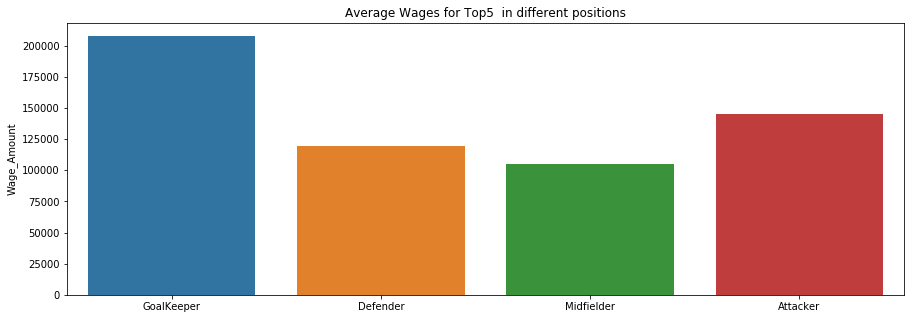

In [158]:
plt.subplots(figsize=(15,5))
sns.barplot(y=Pos_Wage_Avg['Wage_Amount'],x=Pos_Wage_Avg.index)
plt.title('Average Wages for Top5  in different positions')
plt.show()

#### Observation-
#### 1)After calculation of Average Wages,if we plot main positionwise,we get to see that Goalkeepers are paid the Highest Average Wage among Top5 player categories
#### 2)The Highest Waged Position is the ST with 249000 euros & Lowest Waged Position is RW with 58600 euros.ST usually are costliest due to the fact that they are the main goalscorers of the team,hence match win rate highly depends on them.
#### 3)Goalkeepers on the other hand usually have average high wages due to the fact that the team's win probability highly depends on the Goalkeeper.
#### 4)Position wise Analysis : 
#### Defence- Costliest-RCB=172000 euros Lowest-RB-76392 euros  Midfield- Costliest-203400 euros Lowest-60496 euros  Attack- Costliest-249000 euros Lowest-58600 euros